In [7]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
#
#
np.random.seed(123)
#
N = 100
beta_0 = 2
beta_1 = 0.4
#
x = np.linspace(start = 0, stop = 20, num = N)
e = np.random.normal(loc = 0, scale = 2, size = N)
y = beta_0 + beta_1 * x + e

In [8]:
# Manual Calculation
#  Estimate the parameters:
x_mat = np.column_stack((np.ones(len(x)), x))
xtx = np.dot(np.transpose(x_mat), x_mat)
xty = np.dot(np.transpose(x_mat), y)
beta_mat_est = np.dot(np.linalg.inv(xtx), xty)
#  Calculate model fit:
y_fit = beta_mat_est[0] + beta_mat_est[1] * x
#  Calculate the residuals:
resid = y - y_fit
#  Estimate the standard errors:
sigma2_est = sum(resid**2) / (len(x) - 2)
var_beta = sigma2_est * np.linalg.inv(np.dot(np.transpose(x_mat), x_mat))
std_err = np.sqrt(np.diag(var_beta))

In [9]:
# Automatically:
lm_fit = sm.OLS(y, x_mat).fit()
# Old way:
#from statsmodels.stats.outliers_influence import summary_table
#dt = summary_table(lm_fit, alpha = 0.05)[1]
#y_prd = dt[:, 2]
#yprd_ci_lower, yprd_ci_upper = dt[:, 6:8].T
# New way:
dt = lm_fit.get_prediction(x_mat).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
print(pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper])).head())

          0         1         2
0  2.026150 -2.585366  6.637667
1  2.107526 -2.501381  6.716433
2  2.188901 -2.417448  6.795250
3  2.270276 -2.333567  6.874119
4  2.351651 -2.249738  6.953040


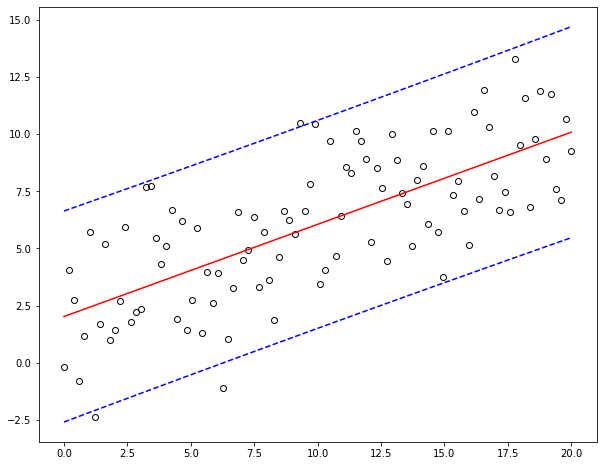

In [10]:
_ = plt.figure(num = 1, figsize=(10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o",
         markerfacecolor = "None", color = "black")
_ = plt.plot(x, y_prd, color = "red")
_ = plt.plot(x, yprd_ci_lower, color = "blue", linestyle = "--")
_ = plt.plot(x, yprd_ci_upper, color = "blue", linestyle = "--")
plt.show()

In [11]:
ym_ci_lower = dt['mean_ci_lower'] 
ym_ci_upper = dt['mean_ci_upper']

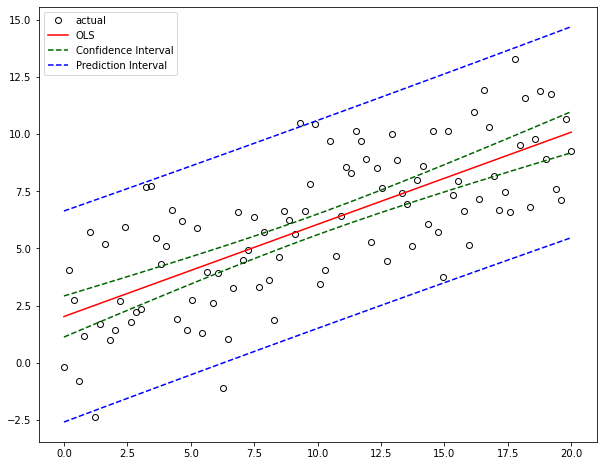

In [12]:
_ = plt.figure(num = 2, figsize=(10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", label = "actual",
         markerfacecolor = "None", color = "black")
_ = plt.plot(x, y_fit, color = "red", label = "OLS")
_ = plt.plot(x, ym_ci_lower, color = "darkgreen", linestyle = "--", 
         label = "Confidence Interval")
_ = plt.plot(x, ym_ci_upper, color = "darkgreen", linestyle = "--")
_ = plt.plot(x, yprd_ci_lower, color = "blue", linestyle = "--", 
         label = "Prediction Interval")
_ = plt.plot(x, yprd_ci_upper, color = "blue", linestyle = "--")
_ = plt.legend()

plt.show()

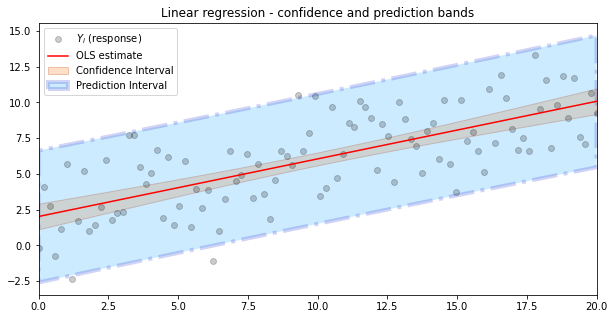

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y,color='black',alpha=0.2, linestyle="",marker="o", label = "$Y_i$ (response)")
ax.plot(x, y_fit, color = "red",label = "OLS estimate")


#ax.plot(pred_band_x, pred_band_low, ':', color='blue', alpha=0.8)
#ax.plot(pred_band_x, pred_band_high, ':', color='blue', alpha=0.8)

ax.fill_between(x, ym_ci_lower, ym_ci_upper, alpha=0.3, edgecolor='#CC4F1B', facecolor='#FF9848', label = "Confidence Interval")
ax.fill_between(x, yprd_ci_lower, yprd_ci_upper, alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True, label = "Prediction Interval")


#plt.hist([eps_hat], bins= 100, range=[-10,10], alpha=0.5)
plt.title('Linear regression - confidence and prediction bands')
ax.set_xlim(0, 20)
plt.legend()
plt.savefig('regression_prediction_intervals.pdf')